# Assignment 4

## Benjamin Smith

Distributed data parallel convolutional network created following in-class example using MNIST handwriting data. Using a single node, I trained the network using 1,2,4, and 8 processes on a single node in the Isaac. Ultimately, I was able to run the networks to train for 30 convolutions for all but the 8 process run. This run had issues with memory and despite my efforts in adjusting the batch size, nothing seemed to work beyond 8 epochs, most were less. However, the metrics from the eight epoch run do allow for some preliminary trends to be noted.

In [1]:
%matplotlib notebook


In [2]:
import pandas as pd

In [3]:
metrics = pd.read_csv('metrics.csv', index_col=0)
metrics2 = pd.read_csv('metrics2.csv', index_col=0)
metrics2 = metrics2.head(-1)
metrics4 = pd.read_csv('metrics4.csv', index_col=0)
metrics4 = metrics4.head(-1)
metrics8 = pd.read_csv('metrics8.csv', index_col=0)


In [17]:
print('Single Process',  '\n',metrics, '\n', 'Two Processes', '\n',metrics2, '\n', 'Four Processes', '\n', metrics4, '\n', 'Eight Processes', '\n', metrics8)


Single Process 
     epoch_losses  elapsed_time
0       2.204035     15.616280
1       1.632521     31.999500
2       1.302742     48.260159
3       1.105619     64.471658
4       1.015852     80.666655
5       0.958548     96.737058
6       0.908479    112.613976
7       0.848498    128.545602
8       0.796615    144.648279
9       0.764532    160.500269
10      0.744071    176.301880
11      0.729689    192.287536
12      0.720390    208.236876
13      0.713023    223.980001
14      0.706670    239.774498
15      0.701490    255.532667
16      0.697335    271.365096
17      0.694337    287.311562
18      0.691803    303.168888
19      0.689113    319.117837
20      0.685780    335.066684
21      0.682837    351.013932
22      0.681907    366.874237
23      0.679641    382.706546
24      0.677960    398.665316
25      0.676380    414.470786
26      0.673712    430.374552
27      0.672679    446.279745
28      0.671115    462.248175
29      0.669839    478.204557 
 Two Processes 
     

<IPython.core.display.Javascript object>


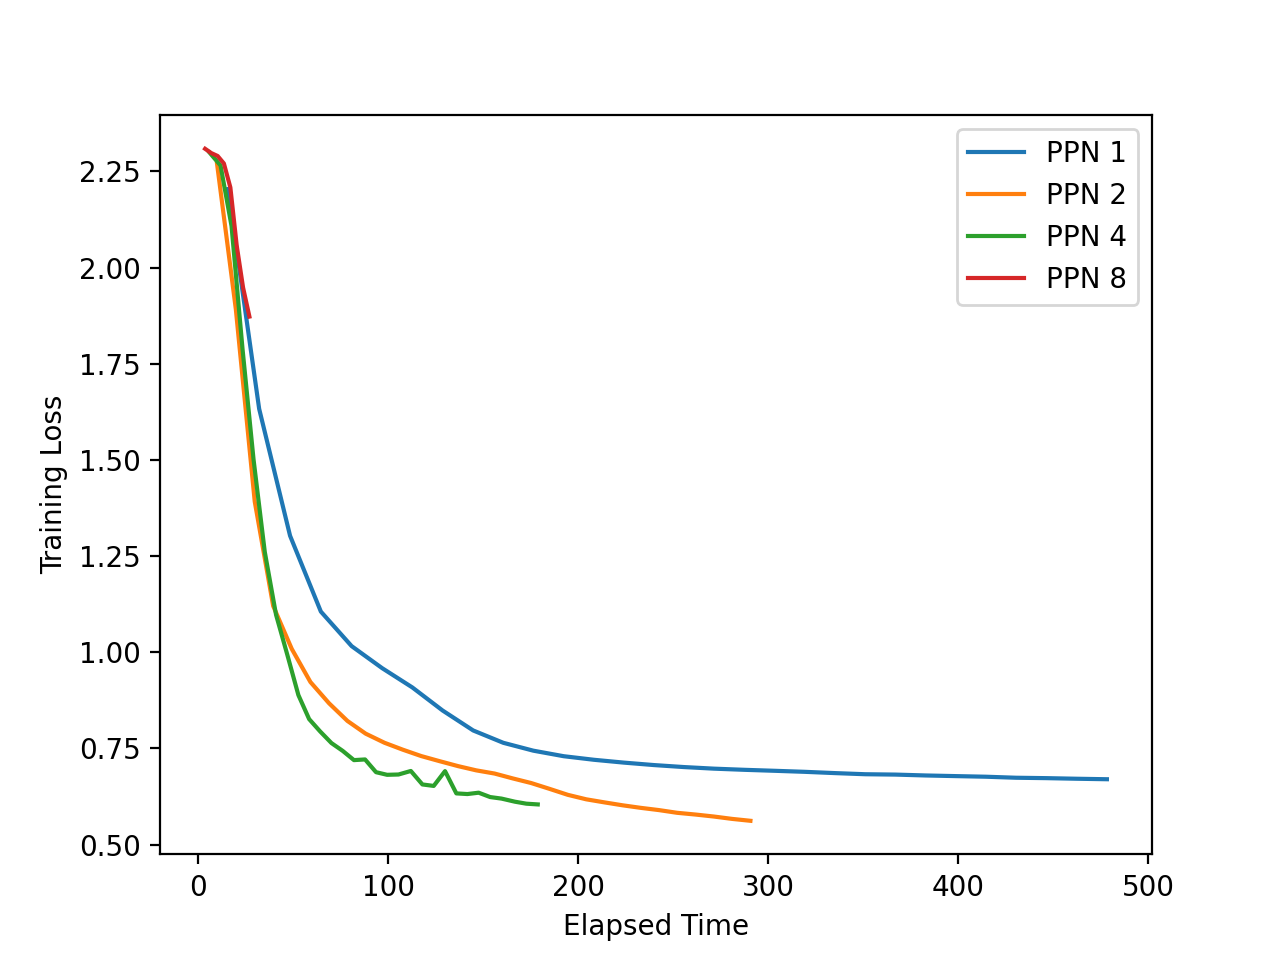

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(metrics.elapsed_time, metrics.epoch_losses, label='PPN 1')
plt.plot(metrics2.elapsed_time, metrics2.epoch_losses, label='PPN 2')
plt.plot(metrics4.elapsed_time, metrics4.epoch_losses, label = 'PPN 4')
plt.plot(metrics8.elapsed_time, metrics8.epoch_losses, label = 'PPN 8')
plt.xlabel('Elapsed Time')
plt.ylabel('Training Loss')
plt.legend()

<IPython.core.display.Javascript object>


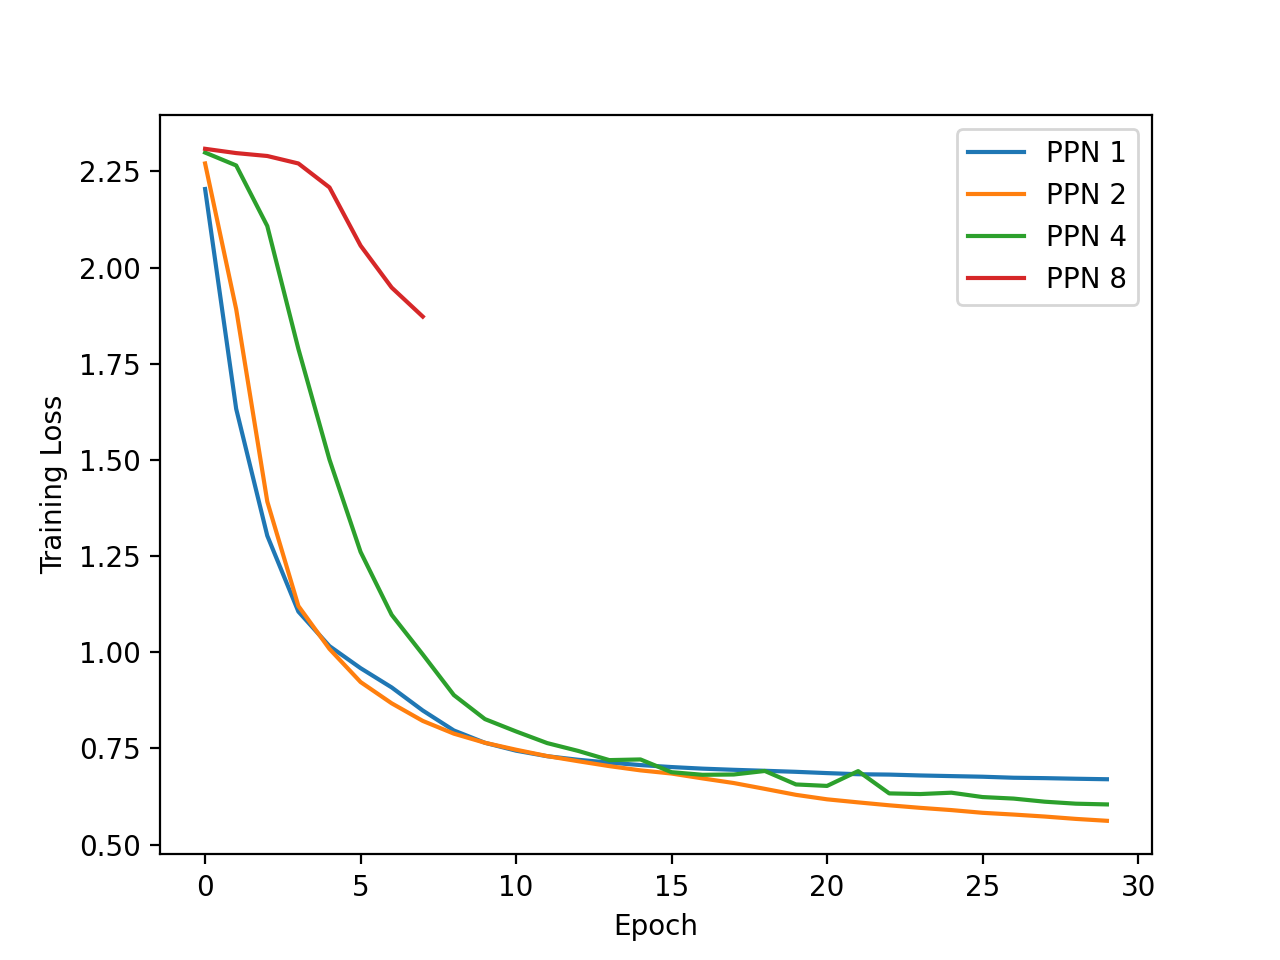

In [5]:
plt.figure()
plt.plot(metrics.epoch_losses, label='PPN 1')
plt.plot(metrics2.epoch_losses, label='PPN 2')
plt.plot(metrics4.epoch_losses, label = 'PPN 4')
plt.plot(metrics8.epoch_losses, label = 'PPN 8')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()

<IPython.core.display.Javascript object>


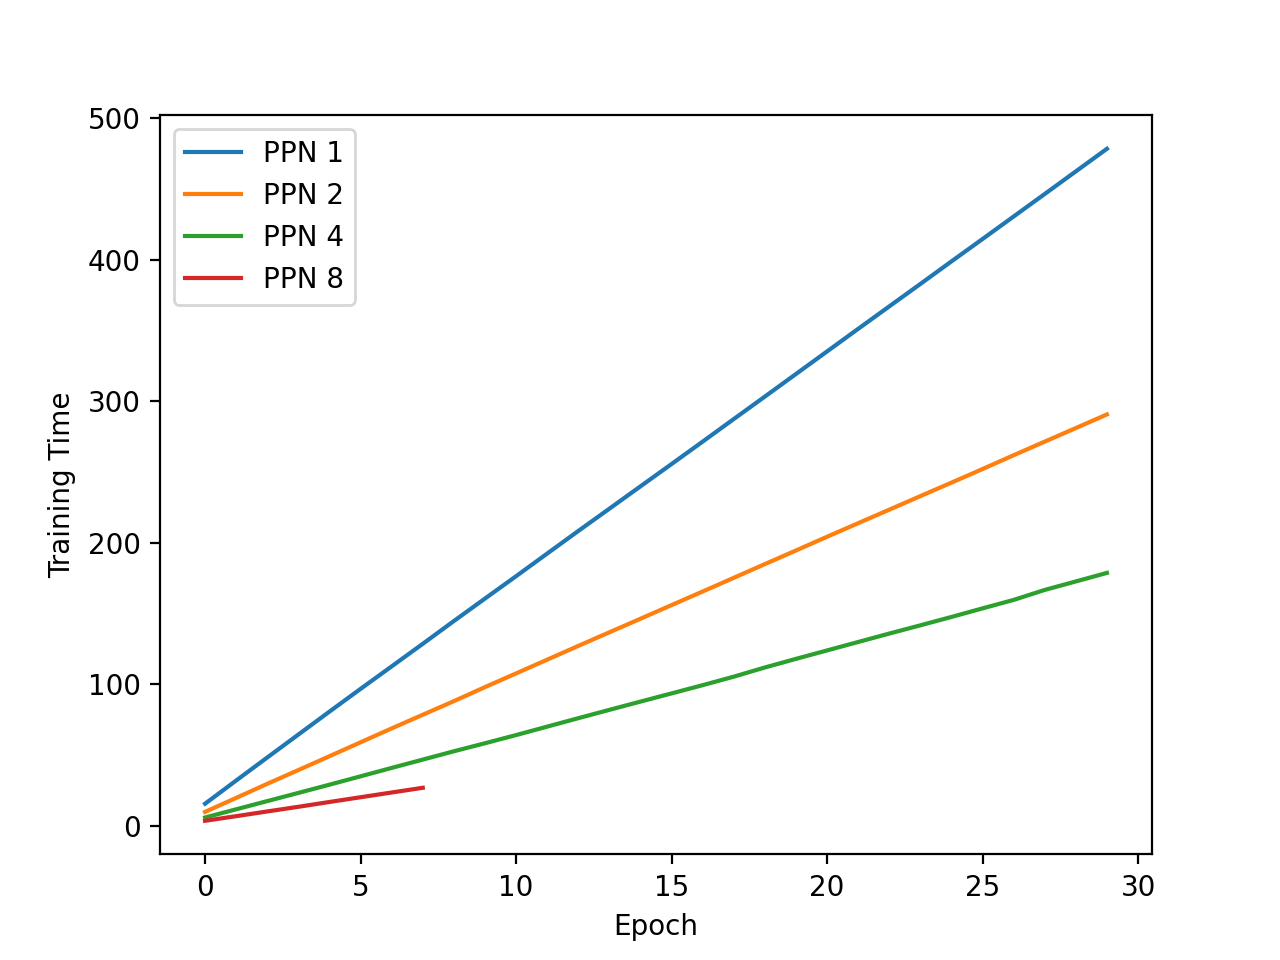

In [6]:
plt.figure()
plt.plot(metrics.elapsed_time, label='PPN 1')
plt.plot(metrics2.elapsed_time, label='PPN 2')
plt.plot(metrics4.elapsed_time, label = 'PPN 4')
plt.plot(metrics8.elapsed_time, label = 'PPN 8')
plt.xlabel('Epoch')
plt.ylabel('Training Time')
plt.legend()

These graphs give a clear demonstration of the benefit to added parallel processes in the reduction of training time per epoch and the overall reduction of loss over time. While the more proccesses had larger losses at lower epochs, they still trained faster than the single node network. We were asked to provide a plot of the total runtime by number of procceses, this I did not replicated because the total training time was not the true time for the 8 process run. Instead, we can identify this relationship in the first graph, mainly with the endpoints of the 1,2, and 4 process runs. Once can see that the relationship is not completely direct as there as some non-parallelizable aspects of the code. By this I mean that the speedup is not quite linearly related to the number of procceses, which is whatwe expect to see. This seemingly aligns with Amdahl's law, but I do not have the profile to measure the exact ratios of each propotion.

I decided to make this graph without the 8 procceses. Although it is just 3 points, you can see the non-linear speedup expected.

<IPython.core.display.Javascript object>


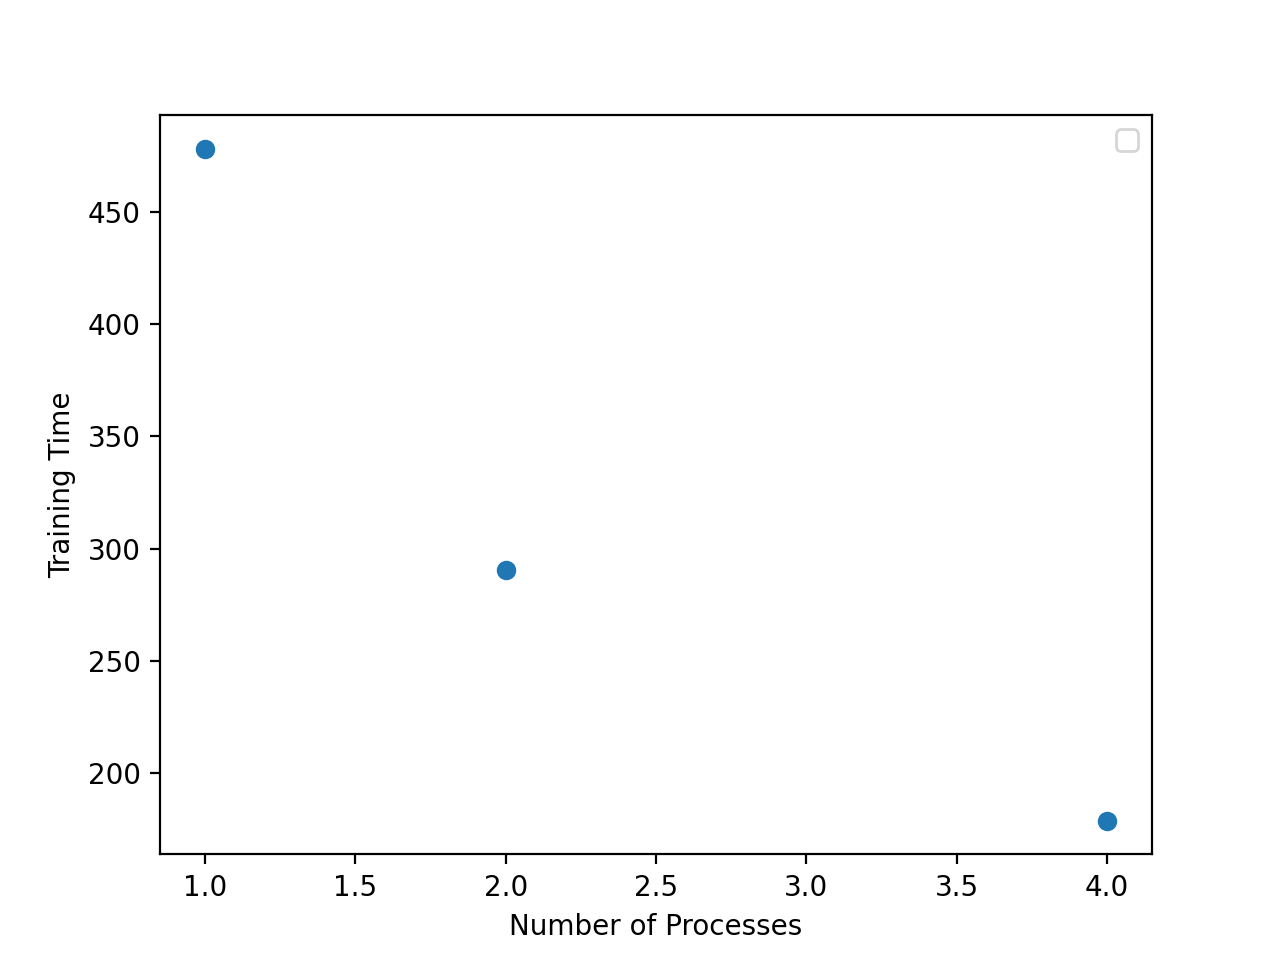

No handles with labels found to put in legend.


In [25]:
x = [478.204557,290.569902,178.636330]
y = [1,2,4]
plt.figure()
plt.scatter(y,x)
plt.ylabel('Training Time')
plt.xlabel('Number of Processes')
plt.legend()